In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Read dataset
 Attribute Information: (class attribute has been moved to last column)

| Attribute  | Domain |
|------------- | ------------- |
|Sample code number  | 1 - 10  |
|Clump Thickness| 1 - 10  |
|Uniformity of Cell Size| 1 - 10  |
|Uniformity of Cell Shape  | 1 - 10  |
|Marginal Adhesion  | 1 - 10  |
|Single Epithelial Cell Size  | 1 - 10  |
|Bare Nuclei  | 1 - 10  |
|Bland Chromatin  | 1 - 10  |
|Normal Nucleoli  | 1 - 10  |
|Mitoses  | 1 - 10  |
|Class  | 2 for benign, 4 for malignant  |

##  Create the column names and read data

In [3]:
columnNames = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]
data = pd.read_csv('breast-cancer-wisconsin.data', names = columnNames)
print(data.shape)
data.head(10)

(699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Remove missing attribute values
>According to the documentation: There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?". 

In [4]:
#Replace ？ with NaN
data = data.replace(to_replace='?',value = np.nan)
#Discard data with missing values (discard as long as one dimension is missing)
data = data.dropna(how='any')
data.shape

(683, 11)

## Suffer dataset
>random.seed = 17

In [5]:
data_shuffled = shuffle(data,random_state = 17).reset_index(drop=True)
data_shuffled.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1231853,4,2,2,1,2,1,2,1,1,2
1,1304595,3,1,1,1,1,1,2,1,1,2
2,1083817,3,1,1,1,2,1,2,1,1,2
3,1175937,5,4,6,7,9,7,8,10,1,4
4,188336,5,3,2,8,5,10,8,1,2,4
5,1080233,7,6,6,3,2,10,7,1,1,4
6,1232225,10,4,5,5,5,10,4,1,1,4
7,1230175,10,10,10,3,10,10,9,10,1,4
8,1212422,3,1,1,1,2,1,3,1,1,2
9,1243256,10,4,3,2,3,10,5,3,2,4


In [10]:
data1 =data.astype('int')
data_list = data1.values.tolist()
label =label.astype('int')
label_list = label.values.tolist()
print(len(data_list))

683


#  Split the dataset
## as five parts to do cross-fold validation

In [36]:
num = np.random.randint(1,1000)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=num)
data_train_index,data_test_index = [],[]
for train_index, test_index in kf.split(data):
    data_train_index.append(train_index)
    data_test_index.append(test_index)
data_train, label_train = [], []
data_test,label_test = [],[]
for i in range(5):
    temp = []
    for j in range(len(data_train_index[i])):
        temp.append(data_list[data_train_index[i][j]])
    data_train.append(temp)
    temp = []
    for j in range(len(data_train_index[i])):
        temp.append(label_list[data_train_index[i][j]])
    label_train.append(temp)

    temp = []
    for k in range(len(data_test_index[i])):
        temp.append(data_list[data_test_index[i][k]])
    data_test.append(temp)
    temp = []
    for k in range(len(data_test_index[i])):
        temp.append(label_list[data_test_index[i][k]])
    label_test.append(temp)
print(data_train_index[0][:5])
print(data_test_index[0][:5])
print(data_train[0][:5])
print(label_train[0][:5])
print(data_test[0][:5])
print(label_test[0][:5])

[1 2 3 5 7]
[0 4 6 8 9]
[[3, 1, 1, 1, 1, 1, 2, 1, 1, 1], [3, 1, 1, 1, 2, 1, 2, 1, 1, 1], [5, 4, 6, 7, 9, 7, 8, 10, 1, 1], [7, 6, 6, 3, 2, 10, 7, 1, 1, 1], [10, 10, 10, 3, 10, 10, 9, 10, 1, 1]]
[2, 2, 4, 4, 4]
[[4, 2, 2, 1, 2, 1, 2, 1, 1, 1], [5, 3, 2, 8, 5, 10, 8, 1, 2, 1], [10, 4, 5, 5, 5, 10, 4, 1, 1, 1], [3, 1, 1, 1, 2, 1, 3, 1, 1, 1], [10, 4, 3, 2, 3, 10, 5, 3, 2, 1]]
[2, 4, 4, 2, 4]


In [37]:
for i in range(5):
    num = np.random.randint(1,1000)
#     kf = KFold(n_splits=5,shuffle=True,random_state=num)
#     data_train_index,data_test_index = [],[]
#     for train_index, test_index in kf.split(data):
#         data_train_index.append(train_index)
#         data_test_index.append(test_index)
    five_parts(num)
    print(data_train_index[i][:5])
    print(data_test_index[i][:5])

[1 2 3 5 7]
[0 4 6 8 9]
[0 1 2 3 4]
[11 20 23 24 28]
[0 2 3 4 5]
[ 1 19 26 29 33]
[0 1 2 4 6]
[ 3  5  7 17 21]
[0 1 3 4 5]
[ 2 10 12 13 14]


In [38]:
data_train, label_train = [], []
data_test,label_test = [],[]
for i in range(5):
    
    temp = []
    for j in range(len(data_train_index[i])):
        temp.append(data_list[data_train_index[i][j]])
    data_train.append(temp)
    temp = []
    for j in range(len(data_train_index[i])):
        temp.append(label_list[data_train_index[i][j]])
    label_train.append(temp)
    print('Length of No.%i train dateset: %i '%(i+1,len(data_train[i])))
    print('Length of No.%i train label: %i '%(i+1,len(label_train[i])))
    
    temp = []
    for k in range(len(data_test_index[i])):
        temp.append(data_list[data_test_index[i][k]])
    data_test.append(temp)
    temp = []
    for k in range(len(data_test_index[i])):
        temp.append(label_list[data_test_index[i][k]])
    label_test.append(temp)
    print('Length of No.%i test dateset: %i '%(i+1,len(data_test[i])))
    print('Length of No.%i test label: %i '%(i+1,len(label_test[i])))
    
print(data_train[0][:5])
print(label_train[0][:5])
print(data_test[0][:5])
print(label_test[0][:5])

Length of No.1 train dateset: 546 
Length of No.1 train label: 546 
Length of No.1 test dateset: 137 
Length of No.1 test label: 137 
Length of No.2 train dateset: 546 
Length of No.2 train label: 546 
Length of No.2 test dateset: 137 
Length of No.2 test label: 137 
Length of No.3 train dateset: 546 
Length of No.3 train label: 546 
Length of No.3 test dateset: 137 
Length of No.3 test label: 137 
Length of No.4 train dateset: 547 
Length of No.4 train label: 547 
Length of No.4 test dateset: 136 
Length of No.4 test label: 136 
Length of No.5 train dateset: 547 
Length of No.5 train label: 547 
Length of No.5 test dateset: 136 
Length of No.5 test label: 136 
[[3, 1, 1, 1, 1, 1, 2, 1, 1, 1], [3, 1, 1, 1, 2, 1, 2, 1, 1, 1], [5, 4, 6, 7, 9, 7, 8, 10, 1, 1], [7, 6, 6, 3, 2, 10, 7, 1, 1, 1], [10, 10, 10, 3, 10, 10, 9, 10, 1, 1]]
[2, 2, 4, 4, 4]
[[4, 2, 2, 1, 2, 1, 2, 1, 1, 1], [5, 3, 2, 8, 5, 10, 8, 1, 2, 1], [10, 4, 5, 5, 5, 10, 4, 1, 1, 1], [3, 1, 1, 1, 2, 1, 3, 1, 1, 1], [10, 4, 3, 2,

# Augment the feature vector x with an additional constant dimension

In [9]:
data, label =data_shuffled[columnNames[1:10]], data_shuffled[columnNames[10]]
data['Extra features'] = 1
data.head(10)

C:\Users\Alienware\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Extra features
0,4,2,2,1,2,1,2,1,1,1
1,3,1,1,1,1,1,2,1,1,1
2,3,1,1,1,2,1,2,1,1,1
3,5,4,6,7,9,7,8,10,1,1
4,5,3,2,8,5,10,8,1,2,1
5,7,6,6,3,2,10,7,1,1,1
6,10,4,5,5,5,10,4,1,1,1
7,10,10,10,3,10,10,9,10,1,1
8,3,1,1,1,2,1,3,1,1,1
9,10,4,3,2,3,10,5,3,2,1


In [39]:
data1 =data.astype('int')
data_list = data1.values.tolist()
label =label.astype('int')
label_list = label.values.tolist()
print(len(data_list))

683


# Scale linearly the attribute values $x_{ij} $ into $\left[ -1,1\right] $ for each dimensional feature as follows:
>$$
x_{ij} \leftarrow 2\frac{x_{ij}-min_i x_{ij}+10^{-6}}{max_ix_{ij}-min_ix_{ij}+10^{-6}} -1
$$

In [112]:
def Scale(data):
    arr =  np.array(data)
    new_data = []
    for i in range(len(arr)):
        tmp = []
        for j in range(len(arr[i])):
#             tmp.append(2*((arr[i][j]-np.min(arr[i])*arr[i][j]+1E-6)/(np.max(arr[i])-np.min(arr[i])*arr[i][j]+1E-6))-1)
            tmp.append(2*((arr[i][j]-np.min(arr[i])+1E-6)/(np.max(arr[i])-np.min(arr[i])+1E-6))-1)
        new_data.append(tmp)
    return new_data

In [202]:
arr = Scale(data_list)
for i in range(5):
    print(data_list[i])
    print(arr[i])

[4, 2, 2, 1, 2, 1, 2, 1, 1, 1]
[1.0, -0.3333328888890371, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.9999993333335555, -0.9999993333335555]
[3, 1, 1, 1, 1, 1, 2, 1, 1, 1]
[1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.9999990000005, -0.9999990000005]
[3, 1, 1, 1, 2, 1, 2, 1, 1, 1]
[1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.9999990000005, -0.9999990000005]
[5, 4, 6, 7, 9, 7, 8, 10, 1, 1]
[-0.11111098765433458, -0.3333331851852016, 0.11111120987653234, 0.33333340740739925, 0.7777778024691331, 0.33333340740739925, 0.5555556049382662, 1.0, -0.9999997777778025, -0.9999997777778025]
[5, 3, 2, 8, 5, 10, 8, 1, 2, 1]
[-0.11111098765433458, -0.5555553827160685, -0.7777775802469356, 0.5555556049382662, -0.111110987654334

#  Reset the example vector x according its label y
>$$
x \leftarrow \begin{cases}
x, & \text {$y \in \omega _1$} \\
-x, &\text{$y \in \omega _2$}
\end{cases}
$$
$$\omega _1 = 2 $$ $$\omega _2 = 4 $$

In [120]:
def reset(data,label,num):
    data_new=[]
    for i in range(len(label)):
        if label[i] == num:
            tmp = []
            for j in range(len(data[i])):
                tmp.append(data[i][j]*-1)
            data_new.append(tmp)
        else:
            tmp = []
            for j in range(len(data[i])):
                tmp.append(data[i][j])
            data_new.append(tmp)
    return data_new

In [221]:
arr_rs  = reset(arr,label_list,4)
for i in range(5):
    print('Label is {}\nOrignal data is {}\nReseted data is {}'.format(label_list[i],arr[i],arr_rs[i]))

Label is 2
Orignal data is [1.0, -0.3333328888890371, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.9999993333335555, -0.9999993333335555]
Reseted data is [1.0, -0.3333328888890371, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.9999993333335555, -0.9999993333335555]
Label is 2
Orignal data is [1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.9999990000005, -0.9999990000005]
Reseted data is [1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.9999990000005, -0.9999990000005]
Label is 2
Orignal data is [1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.999999

# Find the weight vector $\omega$
>$$
\omega \leftarrow \left( X^T X  \right)^{-1}X^Ty
$$

In [145]:
def find_wv(X,y):
    X_T =np.transpose(X)
    y = np.array(y).reshape(-1,1)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X_T,X)),X_T),y)
    return w

In [187]:
def find_wv_one(X):
    X_T =np.transpose(X)
    one = np.ones([len(X),1])
    w = np.dot(np.dot(np.linalg.inv(np.dot(X_T,X)),X_T),one)
    return w

In [222]:
w = find_wv(arr_rs,label_list)
w1 = find_wv_one(arr_rs)
print(w1)

[[-0.03175009]
 [-0.28103875]
 [-0.15768871]
 [-0.09855789]
 [ 0.07265304]
 [-0.44839181]
 [-0.01077793]
 [-0.26390762]
 [-0.13777969]
 [ 0.3498008 ]]


In [196]:
new_label = np.dot(arr_rs, w1)
print(new_label)

[[ 0.69270299]
 [ 0.93315955]
 [ 1.00581256]
 [ 0.52803877]
 [ 0.2136306 ]
 [ 0.46118242]
 [ 0.31058398]
 [ 1.27577347]
 [ 0.99503464]
 [ 0.35739016]
 [ 0.37131975]
 [ 0.03927036]
 [ 1.07846557]
 [ 0.98588179]
 [ 0.94667344]
 [ 0.04091723]
 [ 0.99237315]
 [ 1.02678472]
 [ 1.6926696 ]
 [ 0.81718685]
 [ 0.93315955]
 [ 0.86838777]
 [ 1.25494885]
 [ 0.98588179]
 [ 0.64052682]
 [ 1.20177152]
 [ 0.94393796]
 [ 1.00581256]
 [ 0.61003235]
 [ 0.61543819]
 [ 0.28299319]
 [ 1.15274257]
 [-0.62151438]
 [ 1.15274257]
 [ 0.8592875 ]
 [ 0.30293298]
 [-0.01380823]
 [ 1.22381127]
 [ 1.2895694 ]
 [ 0.54627797]
 [ 0.97487551]
 [ 1.15274257]
 [ 0.99503464]
 [ 0.95557026]
 [-0.17496959]
 [ 0.81643479]
 [ 0.38955604]
 [ 0.83946949]
 [ 1.15274257]
 [ 0.82905663]
 [ 0.88160591]
 [ 1.02678472]
 [ 0.89064222]
 [ 0.89415297]
 [ 0.07546016]
 [ 0.98518787]
 [-0.05952355]
 [-0.04505965]
 [ 1.00581256]
 [ 0.91282486]
 [ 1.18978866]
 [ 0.8133336 ]
 [ 0.84292174]
 [ 0.50432191]
 [ 0.94393806]
 [ 0.80741495]
 [ 1.64639

# Predict the example x
>$$
c=\leftarrow \begin{cases}
\omega _1, & \text {$\omega ^T
\begin{bmatrix}
x \\
1
\end{bmatrix}$}\ge 0 \\ 
\omega _2, &\text{otherwise}
\end{cases}
$$

In [227]:
def predict_label(w,x):
    w_T = np.transpose(w)
    label_pre = []
#     x = np.array(x)
    for i in range(len(x)):
#         if np.dot(w_T,np.transpose(x[i])) >= 0:
        if np.dot(w_T,x[i]) >= 0:
            label_pre.append(2)
        else:
            label_pre.append(4)
#         label_pre.append(np.dot(w_T,np.transpose(x[i])))
    return label_pre

In [228]:
label_pre = predict_label(w,arr)
print(np.array(data_list)[0].shape)
print(label_pre[:40])
print(label_list[:40])

(10,)
[2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4]
[2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4]


In [233]:
label_pre1 = predict_label(w1,arr)
print(label_pre1[:20])
print(label_list[:20])

[2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2]
[2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2]


# Test stage : 
Estimate the accuracy on the test set, that is the fraction of the correctlyclassified examples in the total test set

In [132]:
def acc(predict,original):
    if len(predict)!=len(original):
        print('Error:The length of the predicted value does not match the length of the original value！')
    right = 0
    for i in range(len(predict)):
        if predict[i]==original[i]:
            right+=1
    return right/len(predict)

In [232]:
acc1 = acc(label_pre,label_list)
print(acc1)
acc2 = acc(label_pre1,label_list)
print(acc2)

0.9106881405563689
0.9355783308931186


# Repeat 5-cross-fold validation for 5 times to average all accuracy performance

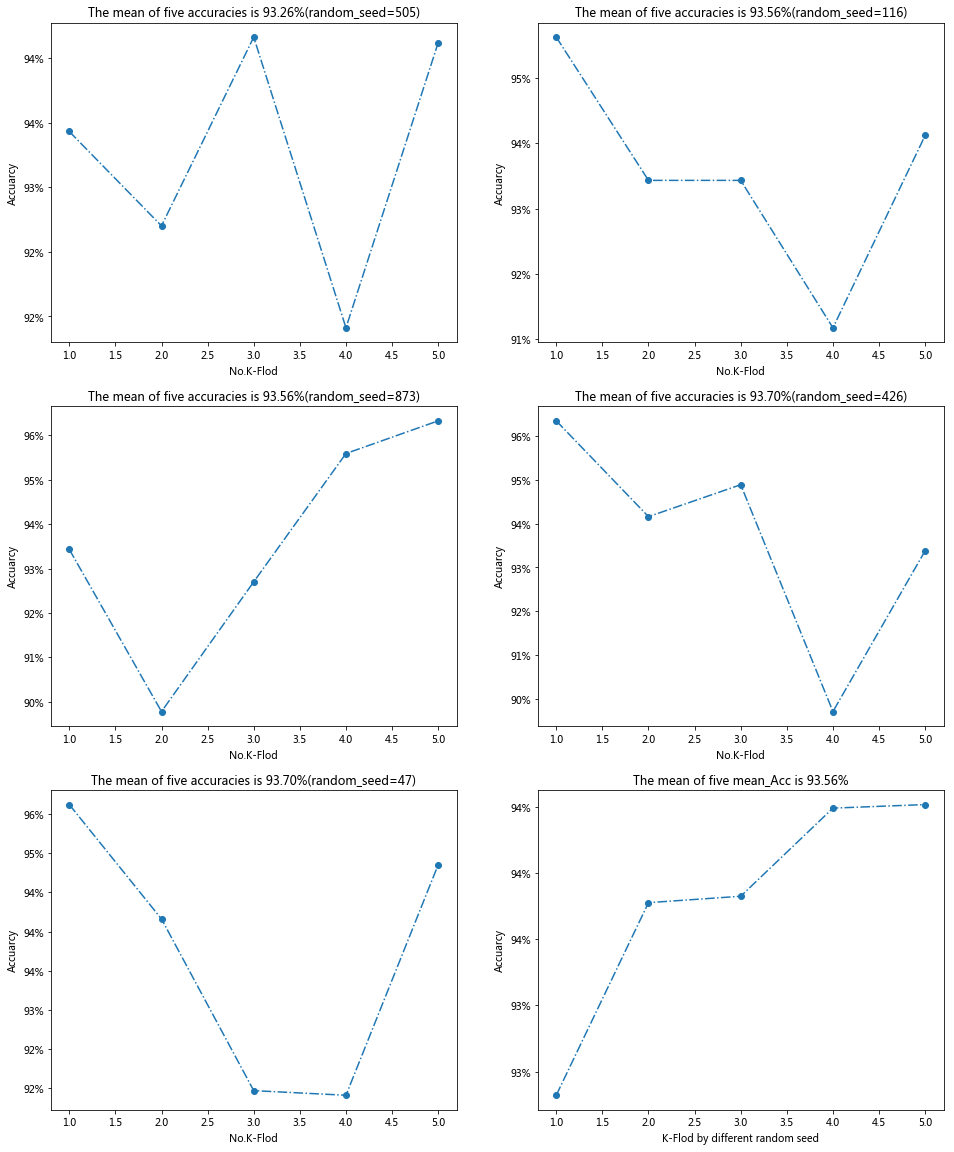

In [216]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
mean_Acc = []
plt.figure(figsize=(16,20))
plt.subplots_adjust(wspace =0.2, hspace =0.2)
x = range(1,6)
for z in x:
    num = np.random.randint(1,1000)
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5,shuffle=True,random_state=num)
    data_train_index,data_test_index = [],[]
    for train_index, test_index in kf.split(data):
        data_train_index.append(train_index)
        data_test_index.append(test_index)
    data_train, label_train = [], []
    data_test,label_test = [],[]
    for i in range(5):
        temp = []
        for j in range(len(data_train_index[i])):
            temp.append(data_list[data_train_index[i][j]])
        data_train.append(temp)
        temp = []
        for j in range(len(data_train_index[i])):
            temp.append(label_list[data_train_index[i][j]])
        label_train.append(temp)

        temp = []
        for k in range(len(data_test_index[i])):
            temp.append(data_list[data_test_index[i][k]])
        data_test.append(temp)
        temp = []
        for k in range(len(data_test_index[i])):
            temp.append(label_list[data_test_index[i][k]])
        label_test.append(temp)
    Acc = []
    for j in x:
        X = Scale(data_train[j-1])
        y = label_train[j-1]
        X_rs = reset(X,y,4)
#         w = find_wv(X_rs,y)
        w = find_wv_one(X_rs)
        X_test = Scale(data_test[j-1])
        y_pre = predict_label(w,X_test)
        Acc.append(acc(y_pre,label_test[j-1]))
    plt.subplot(3,2,z)
    plt.plot(x,Acc,'-.o')
    def to_percent(temp, position):
        return '%1.0f'%(100*temp) + '%'
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(to_percent))
    plt.xlabel('No.K-Flod')
    plt.ylabel('Accuarcy')
    plt.title('The mean of five accuracies is {:.2%}(random_seed={})'.format(np.mean(np.array(Acc)),num))
    mean_Acc.append(np.mean(np.array(Acc)))
plt.subplot(3,2,6)
plt.plot(x,mean_Acc,'-.o')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(to_percent))
# plt.ylim([0.6,0.7])
plt.xlabel('K-Flod by different random seed')
plt.ylabel('Accuarcy')
plt.title('The mean of five mean_Acc is {:.2%}'.format(np.mean(mean_Acc)))
plt.show()